# Trabajo Inteligencia Artificial Unidad 1

**Enunciado**:
    El dataset Sloan Digital Sky Survey DR14 (https://www.sdss.org/dr14/) contiene 10.000 observaciones del espacio tomadas por el SDSS (https://www.sdss.org/). Cada observación es descrita por 17 columnas de características y una columna de clase que la identifica como una estrella, galaxia o quasar. Los datos del SDSS están descritas por características obtenidos por varias mediciones de espectros ópticos y infrarrojos.
    
**Tarea**:
    El ejercicio consiste en aprender distintos modelos de clasificación supervisada capaz de clasificar nuevos datos del SDSS en tres clases: estrella, galaxia o quasar.
    Podrán utilizar los algoritmos de Machine Learning implementado en la libreria Python Scikit-Learn: https://scikit-learn.org/stable/

Cuidarán  el preprocesamiento inicial de los datos brutos para eliminar cualquier inconsistencia.
Analizarán la distribución de las características para evaluar eventuales desequilibros en el dataset.
Entrenarán y evaluarán el rendimiento de al menos tres modelos distintos para resolver esta tarea, utilizando métricas de evaluación apropiadas. 
Compararan el rendimiento de los modelos obtenidos y conversarán las ventajas y desventajas potenciales de cada modelo.
Analizarán los modelos obtenidos para identificar cuáles son las características más relevantes para la clasificación de estrellas, galaxia y quasar.


# Carga del Dataset

In [1]:
#Nuestros datos son al formato CSV 
#En primer lugar cargamos la información

import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

datos = pd.read_csv("SDSS-DR14.csv")
datos[:5]



,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


# Descripción de las características



**objid** : Número identificador del objeto en el espacio

**ra** : Ascención recta en grados

**dec** : Declinación en grados del objeto

**u,g,r,i,z** : magnitudes de los objetos en el SDSS

**run** : Número del escaneo

**rerun** : tipo de escaneo (procesamiento)

**camcol** : Es la salida de una columna de cámara de CCD como parte de un run.

**field** : Parte del camcol que es procesada por el photo pipeline

**specobjid** : Una identificación única de 64 bits codificada en bits utilizada para objetos espectroscópicos ópticos

**class** : clase (GALAXY, QSO o STAR)

**redshift** : Una medida de la velocidad de recesión de una galaxia u otro objeto del cielo.

**plate** : Cada exposición espectroscópica emplea una placa metálica circular grande, delgada, que coloca las fibras ópticas a través de agujeros perforados en las ubicaciones de las imágenes en el plano focal del telescopio.

**mjd** : Fecha juliana modificada, utilizada para indicar la fecha en que se tomó una determinada pieza de datos SDSS (imagen o espectro).

**fiberid** : Cada objeto tiene asignado un ID de fibra correspondiente.

In [2]:
#verificamos si hay datos nulos
datos.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

Como no tenemos datos nulos, no hay que rellenar el dataset, por lo que podemos seguir sin ningún problema.

# Variable de tipo Dummy

In [3]:

datos["class"].replace({'STAR':0, 'GALAXY':1, 'QSO':2}, inplace=True)
datos.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,0,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,0,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,1,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,0,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0,0.000590,3306,54922,512


Es necesario pasar la variable objetivo class que es de tipo categorial, a variable numérica (variables dummy) para que los algoritmos de aprendizaje funcionen de mejor manera.

# Relación entre variables

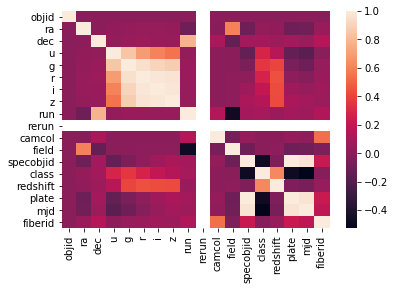

In [4]:

sb.heatmap(datos.corr())

Éste gráfico nos ayuda a visualizar que datos están realacionados entre si y en que proporción.

In [5]:
datos.drop(['objid','fiberid','rerun','specobjid','mjd',],axis=1,inplace=True)
datos[:10]
 

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,0,-0.000009,3306
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,0,-0.000055,323
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,1,0.123111,287
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,0,-0.000111,3306
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,0,0.000590,3306
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,4,269,0,0.000315,324
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,4,269,1,0.100242,287
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,4,269,0,0.000315,3306
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,4,270,0,0.000089,323
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,4,270,1,0.040508,288


Eliminamos las variables que según el gráfico no son independientes uno del otro y que a mi parecer no son relevantes para la predición, como los identificadores.

# REGRESIÓN LOGÍSTICA

Ahora que hemos hecho la carga y limpieza del Dataset, podemos ir aplicando distintos algoritmos de predicción, vamos a partir con el de regresión logística.

In [6]:

X = datos.iloc[:,[0,1,2,3,4,5,6,7,8,9,11,12]]
y = datos.iloc[:,10]
y

0       0
1       0
2       1
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    1
Name: class, Length: 10000, dtype: int64

Separamos la variable objetivo class, de las demás.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

print(X_test)

              ra        dec         u         g         r         i         z  \
3555  173.573276  -0.518473  19.49648  19.36368  19.29852  19.11845  19.08193   
4078  167.449438  -0.204307  19.27516  17.93593  17.16087  16.72539  16.46638   
8445   14.399753  14.601499  17.32164  15.94063  15.26906  14.85143  14.59428   
5939  182.372733  -0.860851  19.56933  18.65260  18.45110  18.37256  18.30464   
5583  142.134485  58.409548  19.04761  18.15117  17.83382  17.69068  17.64062   
...          ...        ...       ...       ...       ...       ...       ...   
3341  227.375806  -0.771168  16.99624  15.53884  14.83586  14.42628  14.12664   
4876  179.919959  -0.534320  18.82454  18.26074  17.93938  17.70602  17.46235   
8343  240.641309  52.250872  16.71322  15.25464  14.72938  14.56272  14.50999   
7913  162.119589   0.660777  19.51074  17.67424  16.77590  16.36040  16.06209   
2190   27.475474  13.126662  19.00817  17.13766  16.36818  15.99174  15.71176   

       run  camcol  field  

Dividimos el dataset en elmentos de entrenamiento y elementos de testeo.

In [8]:
#Aprendizaje
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

C:\Users\patri\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
print("coeficientes del modelo: "+str(LogReg.coef_))
print("intercept: "+str(LogReg.intercept_))

coeficientes del modelo: [[-2.80100696e-03 -4.37392624e-02 -7.24331168e-02 -6.52957176e-02
  -3.84866867e-02 -1.34672322e-02  4.60768616e-03  3.18864487e-03
   5.54745318e-03  2.79294986e-03 -4.09642979e-02  7.11048384e-04]
 [ 4.81806695e-03 -2.95181674e-03  1.06534485e-01  2.12390025e-02
  -3.40349673e-02 -6.91458277e-02 -9.38309453e-02  1.53994174e-03
   1.54562052e-03  2.94788150e-04 -3.77941033e-02 -7.35514221e-04]
 [-2.01705999e-03  4.66910792e-02 -3.41013682e-02  4.40567151e-02
   7.25216540e-02  8.26130599e-02  8.92232592e-02 -4.72858660e-03
  -7.09307370e-03 -3.08773801e-03  7.87584012e-02  2.44658371e-05]]
intercept: [-0.00082792  0.00398633 -0.0031584 ]


In [10]:
y_pred = LogReg.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 946,  348,    6],
       [  35, 1418,    0],
       [  51,  192,    4]], dtype=int64)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1300
           1       0.72      0.98      0.83      1453
           2       0.40      0.02      0.03       247

    accuracy                           0.79      3000
   macro avg       0.68      0.57      0.56      3000
weighted avg       0.78      0.79      0.76      3000



Como vemos en la Matriz de confusión, el algoritmo no funciona bien para predecir si el objeto en cuestión es un cuasar (variable dummy 2) ya que si vemos el promedio de la precision con el recall es muy bajo, esto puede deberse a que la carga del dataset está desbalanceada.

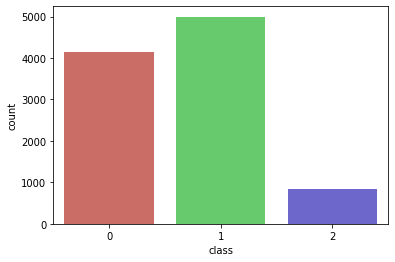

In [13]:
sb.countplot(x='class',data=datos, palette='hls')

Lo último que dije se ve en el siguiente gráfico que muestra el total de muestras que son estrella, galaxia y cuasar. Hay mucha diferencia en la tercera categoría, es decir, nuestro algoritmo va a predecir relativamnte bien las primeras dos categorias, pero con el cuásar va a tener dificultades ya que se ve condicionada por las otras dos, por lo que es necesario balancear el Dataset.

# Oversampling

Una técnica que se usa para balancear el dataset es la de oversampling, que básicamente consiste en rellenar la muestra para asi balancear el gráfico.

In [14]:

from imblearn.over_sampling import RandomOverSampler
from collections import Counter


oversample = RandomOverSampler()
X_train_res, y_train_res = oversample.fit_sample(X_train, y_train)

print ("Distribución antes de hacer oversampling {}".format(Counter(y_train)))
print ("Distribución después de hacer oversampling {}".format(Counter(y_train_res)))


Distribución antes de hacer oversampling Counter({1: 3545, 0: 2852, 2: 603})
Distribución después de hacer oversampling Counter({2: 3545, 1: 3545, 0: 3545})


   Podemos verificar que el balanceo lo hicimos bien viendo la variable "Counter" que nos entrega el numero de muestras para cada clase. Después de hacer oversampling es el mismo valor para las tres categorías.

In [25]:

clf_base = LogisticRegression(max_iter=500)
clf_base.fit(X_train_res, y_train_res)

pred_y = clf_base.predict(X_test)

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1300
           1       0.86      0.92      0.89      1453
           2       0.66      0.87      0.75       247

    accuracy                           0.86      3000
   macro avg       0.81      0.86      0.83      3000
weighted avg       0.86      0.86      0.86      3000



C:\Users\patri\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Como vemos ahora, al hacer un balanceo del dataset y aumentar el numero de iteraciones del algoritmo para cada muestra, el resultado de la precision y el recall aumenta considerablemente.

# Ventajas y desventajas de la Regresión logística

Una de las ventajas de usar ésta técnica es su simplicidad y su eficacia en relación a los resultados entregados, y según las caracteisticas del dataset que consideremos mas importantes, la precision y el recall del algortimo será mejor, asi que depende de nosotros la eficacia del algoritmo al momento de elegir las caracteristicas. En éste caso, como tenemos un problema de clasificación no binaria, una desventaja seria hacer pequeños cambios para que el algoritmo funcione de igual forma, ya que está pensado para problemas que se pueden clasificar en dos categorias, no en tres como es nuestro caso. En conclusión ésta técnica podria no ser la mejor para este problema en particular, pero con los resultados que entrega podemos compararlo para evaluar los otros algoritmos.

# Regresión Lineal

In [15]:
import statsmodels.api as sm

est = sm.OLS(y_train_res, X_train_res).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                  class   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                              9275.
Date:                Sun, 31 May 2020   Prob (F-statistic):                        0.00
Time:                        12:54:24   Log-Likelihood:                         -4830.3
No. Observations:               10635   AIC:                                      9685.
Df Residuals:                   10623   BIC:                                      9772.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [16]:
def predict_class(ra, dec,u,g,r,i,z,run,camcol,field,redshift,plate):
    return -2.505e-05*ra + 0.0007*dec + -0.7894*u + 1.3977*g + 0.2863*r + 0.0170*i + -0.8554*z + 0.0001*run + 0.0033*camcol + -5.571e-05*field + 0.5695*redshift + -8.961e-05*plate


A partir de los coeficientes que nos entrega el OLS podemos generar la función "predict_class" que es el algoritmo que predice la clase de un objeto espacial

# Pruebas del algoritmo de Regresión Lineal

Para evaluar el algoritmo, primero voy a ver las variables que describen a cada clase de objeto espacial (clase 0 es estrella, clase 1 galaxia y clase 2 es cuásar) y después voy a llamar la función que hice "predict_class" y le voy a pasar como argumento el valor de las variables de cada clase. Voy hacer 3 pruebas, 1 para cada clase, como resultado espero que el primero sea un número cercano a 0 el siguiente un número cercano a 1 y el último un número cercano a 2.

In [17]:
datos.head(1)[datos['class']==0]

C:\Users\patri\miniconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate
0,183.531326,0.089693,19.47406,17.0424,15.94699,15.50342,15.22531,752,4,267,0,-0.000009,3306


**VALORES QUE VOY A USAR PARA LA CLASE 0**

In [18]:
datos.head()[datos['class']==1]

C:\Users\patri\miniconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,1,0.123111,287


**VALORES QUE VOY A USAR PARA LA CLASE 1**

In [19]:
datos[datos['class']==2]

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate
15,184.350647,0.207230,18.73832,18.60962,18.39696,18.31174,17.97663,752,4,272,2,0.271937,287
17,184.245664,0.198257,19.22143,19.30248,19.13823,19.11351,19.23454,752,4,272,2,1.178098,287
22,184.654170,0.122673,19.07731,18.64518,18.49678,18.52677,18.45765,752,4,274,2,0.925173,288
45,185.164376,0.074358,17.55001,17.42367,17.35734,17.19343,16.97589,752,4,278,2,2.044347,288
62,160.384806,-0.586705,19.52565,19.29625,18.95885,18.52108,18.57694,756,2,298,2,0.134643,275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9910,212.619523,65.957183,18.86834,18.71241,18.69465,18.44581,18.17429,1350,6,442,2,2.076507,6986
9940,190.138649,-0.245414,19.19568,18.79197,18.54523,18.38367,18.41361,752,3,311,2,1.439024,290
9956,192.199231,-0.312712,18.83507,18.97771,19.30594,19.60962,19.89950,752,3,325,2,2.548733,3849
9968,192.951244,-0.351823,19.20954,18.93043,18.94948,18.90152,18.52991,752,3,330,2,0.407276,292


**VALORES QUE VOY A USAR PARA LA VARIABLE 2**

In [20]:


predic0=predict_class(183.531326,0.089693,19.47406,17.0424,15.94699,15.50342,15.22531,752,4,267,-0.000009,3306)
predic1=predict_class(183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,0.123111,287)
predic2=predict_class(184.350647,0.207230,18.73832,18.60962,18.39696,18.31174,17.97663,752,4,272,0.271937,287)
print(predic0)
print(predic1)
print(predic2)

0.025525688883698106
1.1605327598146489
1.617700000792648


Como vemos, los valores son los esperados, podemos aproximar o truncar cada valor para obtener la predicción adecuada, el algoritmo de regresión lineal funciona bien, al menos para las 3 pruebas que hice pero la tendencia deberia ser buena.

# Ventajas y desventajas de la Regresión lineal
Una ventaja que le veo a usar éste algoritmo es que en éste caso toda la información son datos numéricos, lo que facilita el uso de éste algoritmo, también su simplicidad en python nos permite ver una visualización rápida de los resultados. Por otro lado, un punto en contra es que si algún dato está lejos de la tendencia, puede modificar sustencialmente la estimación y que al momento de evaluar el algoritmo es muy tedieso ir probando una a una las predicciones.


# Árbol de decisión

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

from sklearn import tree
#Entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_res,y_train_res)

In [22]:
y_pred = clf.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1289    9    2]
 [   2 1438   13]
 [   0   28  219]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1300
           1       0.97      0.99      0.98      1453
           2       0.94      0.89      0.91       247

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.96      3000
weighted avg       0.98      0.98      0.98      3000



In [23]:
from sklearn.externals.six import StringIO
import pydot #sudo apt install python3-pydot graphviz

dot_data = StringIO()

features=['ra','dec','u','g','r','i','z','run','camcol','field','redshift','plate']
classes=['0','1','2']
tree.export_graphviz(clf,out_file=dot_data,feature_names=features,class_names=classes, filled=True, 
                     rounded=True, impurity=False)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_png('modelo1.png')


C:\Users\patri\miniconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# Visualización árbol de decisión

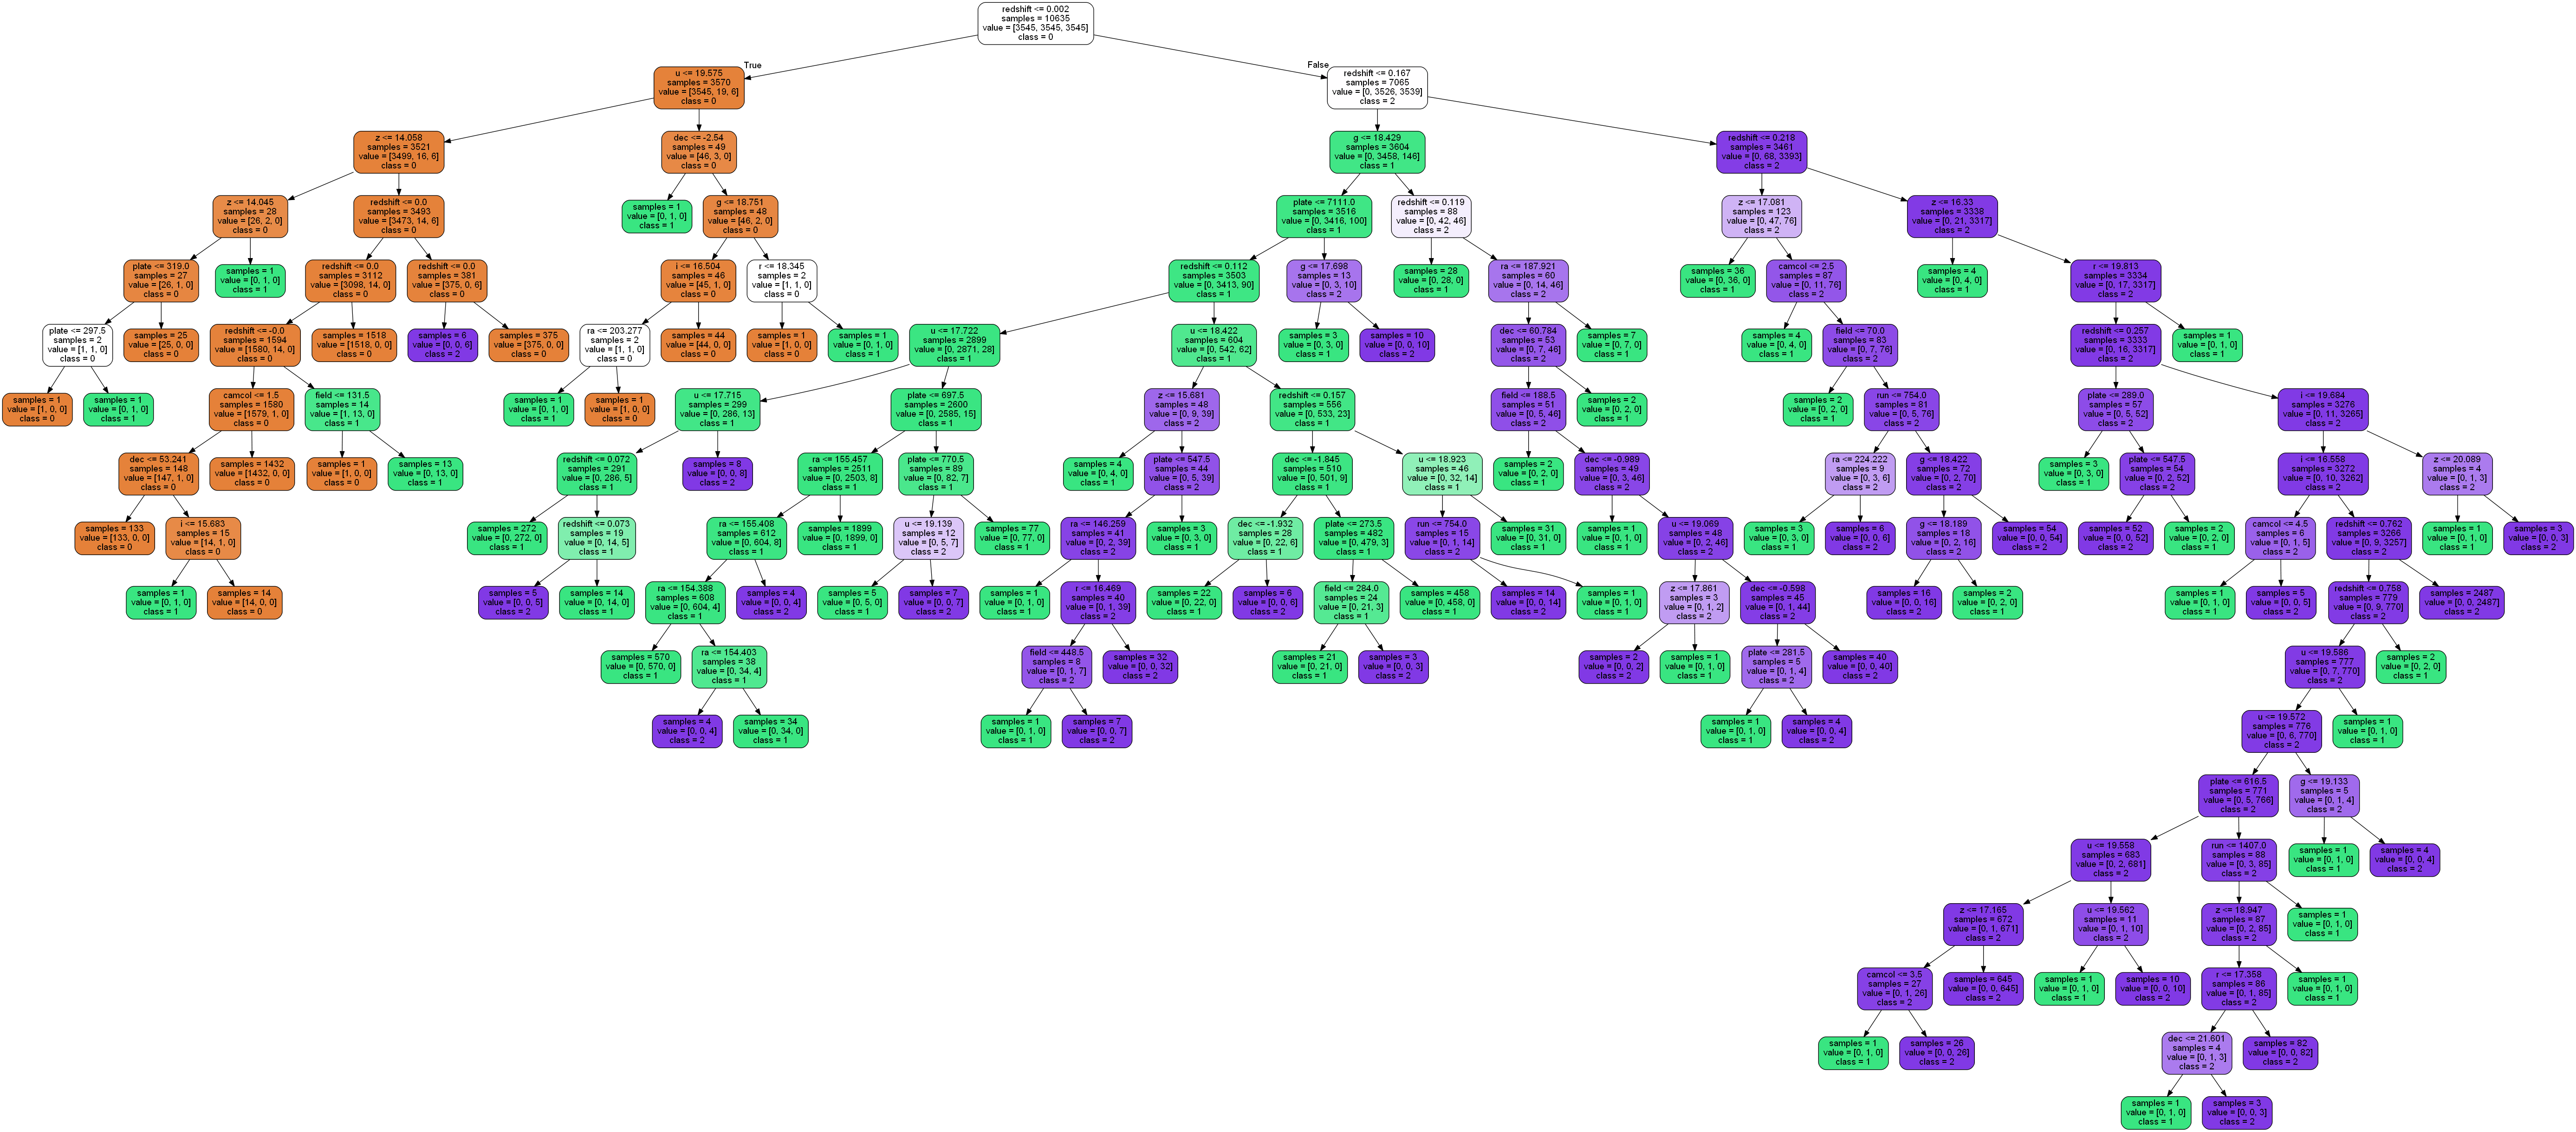

In [24]:
from IPython.display import Image
Image("modelo1.png")

Como vemos en la imagen, el algoritmo de árbol de decisión aprende un camino a seguir para llegar al resultado final que se encuentra en las hojas.

# Ventajas y desventajas del Árbol de decisión
Algo bueno de éste algoritmo es que relaciona bien los elementos no lineales del problema, es rápido al momento de evaluar y preciso y se puede trabajar con variables tanto cuantitativas como cualitativas, tambien podemos visualizar fácilmente el proceso de cada muestra para determinar su clase solo viendo el árbol. Por otro lado, como aspecto negativo es que es muy suceptible al cambio, es decir si cambiamos un poco el dataset del comeinzo puede que salga un árbol totalmente diferente, por lo que la elección de las caracteristicas mas relevantes es un momento crucial para el algoritmo, por esto es recomendable tener un dataset bien balanceado

# Conclusiones finales
Como punto final de éste trabajo, podemos decir que el mejor algoritmo para éste problema de clasificación es el de **árbol de decisión** ya que trabaja bien con valores complejos y no tienen porque ser lineales, también es fácil de visualizar ya que tenemos la opción de ver el árbol que determina las clases. Aprendimos que es necesario tener un dataset balanceado para que los resultados no se vean influenciados por las otras categorias.